# **Clasificación de imágenes usando redes neuronales**


Una de las aplicaciones del aprendizaje profundo es el reconocimiento de imágenes. En la siguiente práctica utilizaremos un dataset con imágenes de perros y gatos, con el fin de clasificarlos según corresponda. El dataset original (disponible [aquí](https://www.kaggle.com/c/dogs-vs-cats/data)) cuenta con 25.000 imágenes; sin embargo, utilizaremos uno con 2.000 imágenes para realizar el ejercicio.

Podemos descargar el dataset filtrado [aquí](https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip). Observaremos que existen dos carpetas principales: train y validation. Las imagenes en cada una de ellas cumplirán la función de entrenamiento y validación, ya que de manera similar a la mayoría de métodos vistos se necesitan datos para ambas etapas

Exploremos un poco las imágenes y observamos que hay 1.000 gatos y 1.000 perros para la fase de entrenamiento. Cada imagen tiene un peso que ronda los 20kb, lo que muestra que realmente no necesitamos imagenes de alta resolución para aplicar el método. Tenemos imágenes de todo tipo de razas, en diferentes posiciones y ambientes.

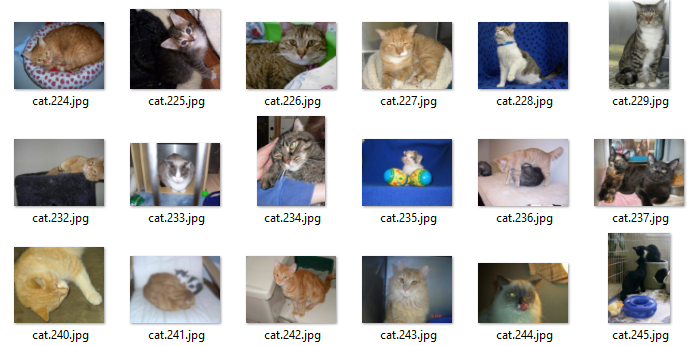

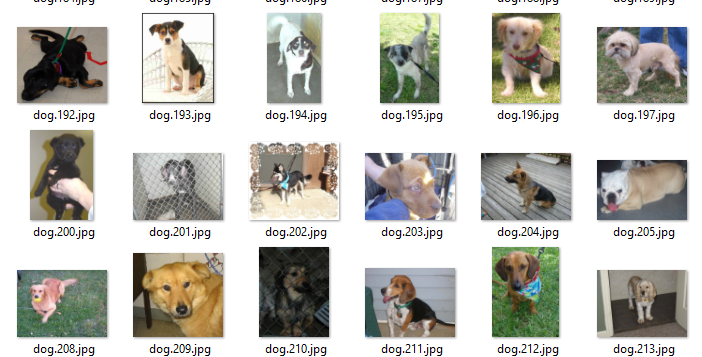

In [2]:
#Lectura de las imágenes y almacenamiento en una carperta temporal
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip

--2020-08-01 19:43:31--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  39.1MB/s    in 1.7s    

2020-08-01 19:43:33 (39.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [65]:
#Descomprimimos el archivo en carpetas
import os
import zipfile

file = '/tmp/cats_and_dogs_filtered.zip'
zip = zipfile.ZipFile(file, 'r')
zip.extractall('/tmp')
zip.close()

In [66]:
#Obtenemos las referencias de las carpetas ya extraídas
main_folder = '/tmp/cats_and_dogs_filtered'
train_folder = os.path.join(main_folder, 'train')
test_folder = os.path.join(main_folder, 'validation')

train_cats_folder = os.path.join(train_folder, 'cats')
train_dogs_folder = os.path.join(train_folder, 'dogs')
test_cats_folder = os.path.join(test_folder, 'cats')
test_dogs_folder = os.path.join(test_folder, 'dogs')

In [67]:
#Podemos mirar los nombres de los archivos
cat_names = os.listdir(train_cats_folder)
dog_names = os.listdir(train_dogs_folder)

print(cat_names[:10])
print(dog_names[:10])

['cat.985.jpg', 'cat.791.jpg', 'cat.276.jpg', 'cat.756.jpg', 'cat.473.jpg', 'cat.462.jpg', 'cat.539.jpg', 'cat.5.jpg', 'cat.381.jpg', 'cat.267.jpg']
['dog.244.jpg', 'dog.827.jpg', 'dog.111.jpg', 'dog.746.jpg', 'dog.745.jpg', 'dog.471.jpg', 'dog.951.jpg', 'dog.950.jpg', 'dog.792.jpg', 'dog.66.jpg']


In [68]:
#Cantidad de imagenes
print("Gatos train: ", len(os.listdir(train_cats_folder)))
print("Perros tain: ", len(os.listdir(train_dogs_folder)))

print("Gatos test: ", len(os.listdir(test_cats_folder)))
print("Perros test: ", len(os.listdir(test_dogs_folder)))

Gatos train:  1000
Perros tain:  1000
Gatos test:  500
Perros test:  500


['/tmp/cats_and_dogs_filtered/train/cats/cat.664.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.392.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.924.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.596.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.349.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.594.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.170.jpg', '/tmp/cats_and_dogs_filtered/train/cats/cat.865.jpg']
['/tmp/cats_and_dogs_filtered/train/dogs/dog.838.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.335.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.523.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.697.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.634.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.808.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.10.jpg', '/tmp/cats_and_dogs_filtered/train/dogs/dog.411.jpg']


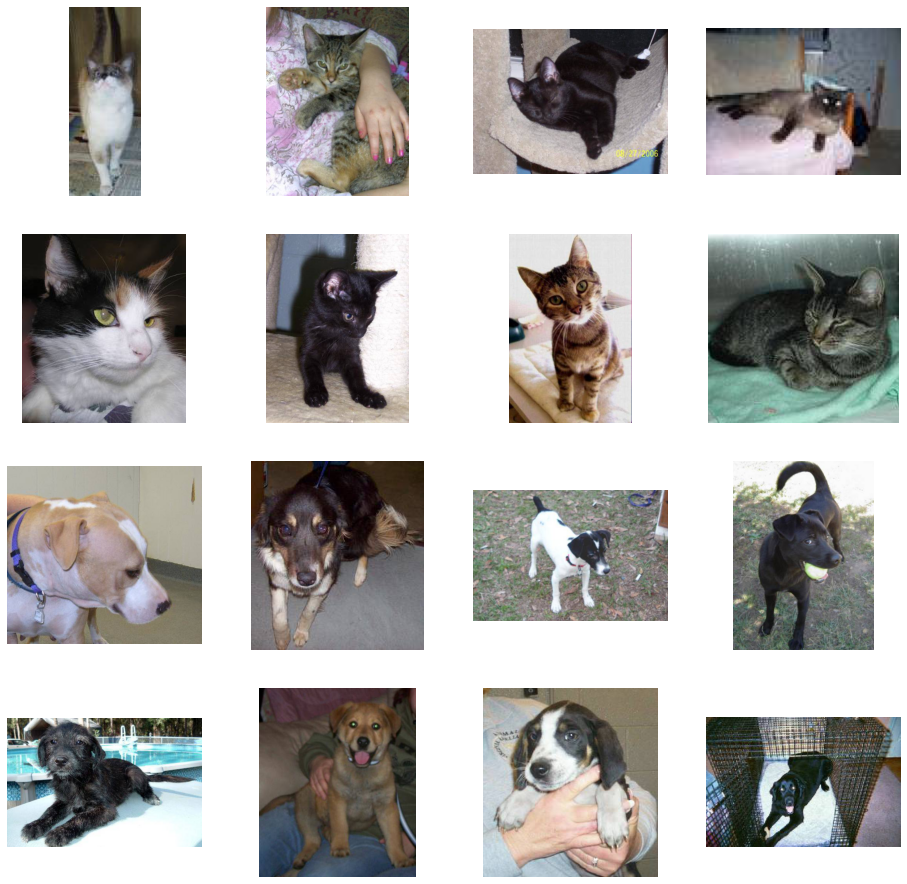

In [69]:
#Visualizar imagenes
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

rows = 4
cols = 4
cantidad = 8

fig = plt.gcf()
fig.set_size_inches(cols*4, rows*4)

#Tomamos 8 nombres de imagenes de la lista
cats_img = [os.path.join(train_cats_folder, name) for name in random.choices(cat_names, k=cantidad)]
dogs_img = [os.path.join(train_dogs_folder, name) for name in random.choices(dog_names, k=cantidad)]

print(cats_img)
print(dogs_img)

for i, ruta_img in enumerate(cats_img + dogs_img):
  sp = plt.subplot(rows, cols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(ruta_img)
  plt.imshow(img)

plt.show()

In [70]:
#Las imagenes deben ser escalas y redimensionadas 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

# Se pueden enviar bloques de imagenes al procesador (batch size)
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = val_datagen.flow_from_directory(
    test_folder,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [71]:
#Las imagenes deben ser redimensionadas al mismo tamaño para poder tener un modelo homogeneo (150x150)
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

model = Sequential([
    #La capa input será una matriz de 150x150x3, donde 150 corresponde a cada pixel y 3 a los colores RGB
    #La primera capa de la red convolucional extraerá 16 filtros con un kernel de 3x3
    layers.Conv2D(16, 3, activation='relu', input_shape=(150, 150, 3)),
    #Una capa de max polling de 2x2 después de la capa convolucional
    layers.MaxPooling2D(2),
    #La segunda capa extraerá 32 filtros de 3x3
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(2),
    #La tercera capa extraerá 64 filtros de 3x3
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    #Compactamos a una dimension y creamos la capa de salida
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    #La salida es binario, puesto que los valores son perro o gato (0 o 1)
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)            

In [72]:
#Compilar el modelo. Seleccionar la función de pérdida, el optimizador y las metricas
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [73]:
#Entrenar el modelo. Se envian 20 imagenes (batch_size) en 100 pasos por epoch.
#La validación corresponde a 50 pasos de 20 imagenes
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=test_generator,
    validation_steps=50,
    verbose=2)

Epoch 1/15
100/100 - 64s - loss: 0.7471 - accuracy: 0.5310 - val_loss: 0.6590 - val_accuracy: 0.6500
Epoch 2/15
100/100 - 64s - loss: 0.6656 - accuracy: 0.6070 - val_loss: 0.6789 - val_accuracy: 0.6080
Epoch 3/15
100/100 - 64s - loss: 0.6443 - accuracy: 0.6420 - val_loss: 0.6090 - val_accuracy: 0.6640
Epoch 4/15
100/100 - 64s - loss: 0.6377 - accuracy: 0.6450 - val_loss: 0.6006 - val_accuracy: 0.6840
Epoch 5/15
100/100 - 64s - loss: 0.6262 - accuracy: 0.6510 - val_loss: 0.5782 - val_accuracy: 0.6800
Epoch 6/15
100/100 - 64s - loss: 0.6115 - accuracy: 0.6740 - val_loss: 0.5923 - val_accuracy: 0.7000
Epoch 7/15
100/100 - 64s - loss: 0.6102 - accuracy: 0.6675 - val_loss: 0.5501 - val_accuracy: 0.7260
Epoch 8/15
100/100 - 64s - loss: 0.6050 - accuracy: 0.6815 - val_loss: 0.5641 - val_accuracy: 0.7080
Epoch 9/15
100/100 - 64s - loss: 0.5989 - accuracy: 0.6960 - val_loss: 0.5651 - val_accuracy: 0.7010
Epoch 10/15
100/100 - 68s - loss: 0.5907 - accuracy: 0.6900 - val_loss: 0.5243 - val_accura

Text(0.5, 1.0, 'Pérdida')

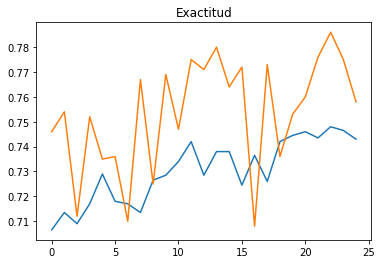

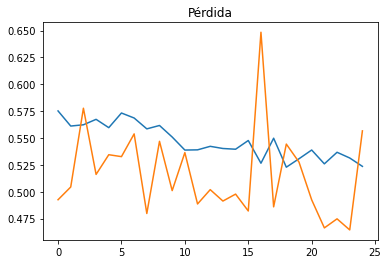

In [62]:
# Calculemos la exactitud del modelo
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Exactitud')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Pérdida')


Ahora ve a internet y descarga algunas imágenes de perros y gatos. 
¡Luego prueba nuestra red neuronal en el siguiente paso!

In [64]:
#Subimos una imagen nueva para predecir

import numpy as np
from google.colab import files
from keras.preprocessing import image

files = files.upload()

for i in files.keys():
  ruta_img_nueva = '/content/' + i
  img_aux = image.load_img(ruta_img_nueva, target_size=(150, 150))

  v = image.img_to_array(img_aux)
  v = np.expand_dims(v, axis=0)
  images = np.vstack([v])

  clases = model.predict(images, batch_size=10)

  if clases[0] > 0:
    print(i, " es un perro")
  else:
    print(i, " es un gato")

Saving Por-que-tu-perro-te-pone-ojitos-asi-se-comunica-mejor-contigo.jpg to Por-que-tu-perro-te-pone-ojitos-asi-se-comunica-mejor-contigo (1).jpg
Saving _107435678_perro1.jpg to _107435678_perro1 (1).jpg
Saving 220px-Cat_November_2010-1a.jpg to 220px-Cat_November_2010-1a (1).jpg
Saving 50320152_101.jpg to 50320152_101 (1).jpg
Saving el-gato-necesita-tener-acceso-al-exterior.jpg to el-gato-necesita-tener-acceso-al-exterior (1).jpg
Saving gato-romano_0.jpg to gato-romano_0 (2).jpg
Por-que-tu-perro-te-pone-ojitos-asi-se-comunica-mejor-contigo.jpg  es un perro
_107435678_perro1.jpg  es un perro
220px-Cat_November_2010-1a.jpg  es un perro
50320152_101.jpg  es un gato
el-gato-necesita-tener-acceso-al-exterior.jpg  es un gato
gato-romano_0.jpg  es un gato
